In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
from tensorflow.keras import layers

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_dir = '/Users/jekad/OneDrive/Documents/Practica Prueba/train'
test_dir = '/Users/jekad/OneDrive/Documents/Practica Prueba/test'

In [7]:
img_height = 64
img_width = 64
batch_size = 32

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizar los valores de píxeles al rango [0, 1]
)

In [9]:
test_datagen = ImageDataGenerator(
    rescale=1./255  # Normalizar los valores de píxeles al rango [0, 1]
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Cambia a 'binary' si tienes solo dos clases
)

Found 1633 images belonging to 8 classes.


In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Cambia a 'binary' si tienes solo dos clases
)

Found 810 images belonging to 8 classes.


In [13]:
num_classes = 8  # Reemplaza 10 con el número real de clases en tu conjunto de datos

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Usamos 'softmax' para la clasificación multiclase
])

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(
    train_generator,
    epochs=8,
    validation_data=test_generator  # Utiliza el conjunto de prueba como datos de validación
)

Epoch 1/8
52/52 [==============================] - 10s 174ms/step - loss: 1.4047 - accuracy: 0.5713 - val_loss: 1.2288 - val_accuracy: 0.5877
Epoch 2/8
52/52 [==============================] - 9s 171ms/step - loss: 0.8853 - accuracy: 0.6895 - val_loss: 0.8927 - val_accuracy: 0.6852
Epoch 3/8
52/52 [==============================] - 9s 167ms/step - loss: 0.7167 - accuracy: 0.7477 - val_loss: 0.6127 - val_accuracy: 0.7877
Epoch 4/8
52/52 [==============================] - 9s 169ms/step - loss: 0.5210 - accuracy: 0.8102 - val_loss: 0.5527 - val_accuracy: 0.7901
Epoch 5/8
52/52 [==============================] - 10s 187ms/step - loss: 0.4499 - accuracy: 0.8322 - val_loss: 0.5115 - val_accuracy: 0.8111
Epoch 6/8
52/52 [==============================] - 10s 184ms/step - loss: 0.3163 - accuracy: 0.8904 - val_loss: 0.6041 - val_accuracy: 0.8049
Epoch 7/8
52/52 [==============================] - 10s 200ms/step - loss: 0.3489 - accuracy: 0.8763 - val_loss: 0.4318 - val_accuracy: 0.8580
Epoch 8/8

In [17]:
from PIL import Image

In [18]:
image = Image.open('train/CLASS_01/14-CAPTURE_20220523_141530_080.png')  # Reemplaza 'ruta/a/tu/imagen.jpg' con la ruta real de tu imagen

FileNotFoundError: [Errno 2] No such file or directory: 'train/CLASS_01/14-CAPTURE_20220523_141530_080.png'

In [19]:
image = Image.open('test/CLASS_01/14-CAPTURE_20220523_141530_080.png')  # Reemplaza 'ruta/a/tu/imagen.jpg' con la ruta real de tu imagen

In [20]:
image = image.resize((img_width, img_height))

In [21]:
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0  # Normaliza los valores de píxeles al rango [0, 1]
image = image.reshape(1, img_height, img_width, 3)  # Añade una dimensión para el lote (batch)

In [22]:
predictions = model.predict(image)

1/1 [==============================] - 0s 76ms/step


In [23]:
predicted_class = tf.argmax(predictions, axis=1)[0]

In [24]:
class_labels = train_generator.class_indices  # Diccionario de etiquetas de clase

predicted_label = [label for label, index in class_labels.items() if index == predicted_class][0]

In [25]:
print(f'La imagen pertenece a la clase: {predicted_label}')

La imagen pertenece a la clase: CLASS_05


In [27]:
image = Image.open('test/CLASS_04/12-CAPTURE_20220421_123205_943.png/')  # Reemplaza 'ruta/a/tu/imagen.jpg' con la ruta real de tu imagen
image = image.resize((img_width, img_height))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0  # Normaliza los valores de píxeles al rango [0, 1]
image = image.reshape(1, img_height, img_width, 3)  # Añade una dimensión para el lote (batch)
predicted_class = tf.argmax(predictions, axis=1)[0]
class_labels = train_generator.class_indices  # Diccionario de etiquetas de clase
predicted_label = [label for label, index in class_labels.items() if index == predicted_class][0]
print(f'La imagen pertenece a la clase: {predicted_label}')

OSError: [Errno 22] Invalid argument: 'test/CLASS_04/12-CAPTURE_20220421_123205_943.png/'

In [28]:
image = Image.open('test/CLASS_04/12-CAPTURE_20220421_123205_943.png')  # Reemplaza 'ruta/a/tu/imagen.jpg' con la ruta real de tu imagen
image = image.resize((img_width, img_height))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0  # Normaliza los valores de píxeles al rango [0, 1]
image = image.reshape(1, img_height, img_width, 3)  # Añade una dimensión para el lote (batch)
predicted_class = tf.argmax(predictions, axis=1)[0]
class_labels = train_generator.class_indices  # Diccionario de etiquetas de clase
predicted_label = [label for label, index in class_labels.items() if index == predicted_class][0]
print(f'La imagen pertenece a la clase: {predicted_label}')

La imagen pertenece a la clase: CLASS_05


In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
import numpy as np

In [31]:
y_pred = model.predict(test_images)

NameError: name 'test_images' is not defined

In [32]:
from PIL import Image
import os
import numpy as np

In [33]:
test_dir = '/Users/jekad/OneDrive/Documents/Practica Prueba/test'

In [34]:
test_images = []
# Lista para almacenar las etiquetas de prueba
test_labels = []

In [35]:
for root, dirs, files in os.walk(test_dir):
    for file in files:
        # Verifica si el archivo es una imagen (puedes ajustar esta comprobación según tu formato de imagen)
        if file.endswith(('.png', '.jpg', '.jpeg')):
            # Carga la imagen usando PIL
            image = Image.open(os.path.join(root, file))
            # Añade la imagen a la lista de imágenes de prueba
            test_images.append(np.array(image))
            # Añade la etiqueta correspondiente (puedes ajustar esto según tu estructura de directorios)
            label = root.split(os.path.sep)[-1]  # Suponiendo que la etiqueta está en el nombre del directorio
            test_labels.append(label)

In [36]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [37]:
y_pred = model.predict(test_images)

ValueError: in user code:

    File "C:\Users\jekad\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\jekad\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jekad\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\jekad\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\jekad\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\jekad\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(None, 216, 384, 3)


In [38]:
from PIL import Image
import os
import numpy as np

In [39]:
test_dir = '/Users/jekad/OneDrive/Documents/Practica Prueba/test'

In [40]:
# Lista para almacenar las imágenes de prueba
test_images = []
# Lista para almacenar las etiquetas de prueba
test_labels = []

In [41]:
img_width = 64
img_height = 64

In [42]:
for root, dirs, files in os.walk(test_dir):
    for file in files:
        # Verifica si el archivo es una imagen (puedes ajustar esta comprobación según tu formato de imagen)
        if file.endswith(('.png', '.jpg', '.jpeg')):
            # Carga la imagen usando PIL
            image = Image.open(os.path.join(root, file))
            # Redimensiona la imagen a las dimensiones esperadas por tu modelo
            image = image.resize((img_width, img_height))
            # Añade la imagen a la lista de imágenes de prueba
            test_images.append(np.array(image))
            # Añade la etiqueta correspondiente (puedes ajustar esto según tu estructura de directorios)
            label = root.split(os.path.sep)[-1]  # Suponiendo que la etiqueta está en el nombre del directorio
            test_labels.append(label)

In [43]:
# Convierte las listas a arrays NumPy
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [44]:
y_pred = model.predict(test_images)

26/26 [==============================] - 0s 14ms/step


In [45]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [46]:
confusion = confusion_matrix(y_true, y_pred_classes)

NameError: name 'y_true' is not defined

In [47]:
# Convierte las etiquetas reales y predicciones a clases (índices de clases)
y_true = np.argmax(test_labels, axis=1)  # Asume que 'test_labels' contiene las etiquetas reales codificadas en one-hot
y_pred_classes = np.argmax(y_pred, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [50]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion = confusion_matrix(test_labels, y_pred_classes)

NameError: name 'y_pred_classes' is not defined

In [51]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [52]:
confusion = confusion_matrix(test_labels, y_pred_classes)

ValueError: Mix of label input types (string and number)

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
label_encoder = LabelEncoder()

In [55]:
y_true_encoded = label_encoder.fit_transform(test_labels)

In [56]:
confusion = confusion_matrix(y_true_encoded, y_pred_classes)

In [57]:
print("Matriz de Confusión:")
print(confusion)

Matriz de Confusión:
[[  0   0   0   0   1   0   0   0]
 [  0   0   0   0  48   0   0   0]
 [  0   0   0   0  97   0   0   0]
 [  0   0   2   0  41   0   2   0]
 [  0   0   0   0 459   0   0   0]
 [  0   0   0   0   4  15   0   0]
 [  0   0   0   0 114   0   0   0]
 [  0   0   0   0  27   0   0   0]]


In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
label_encoder = LabelEncoder()

In [60]:
y_true_encoded = label_encoder.fit_transform(train_labels)
confusion = confusion_matrix(y_true_encoded, y_pred_classes)

NameError: name 'train_labels' is not defined

In [61]:
train_dir = '/Users/jekad/OneDrive/Documents/Practica Prueba/train'

In [62]:
# Lista para almacenar las imágenes de prueba
train_images = []
# Lista para almacenar las etiquetas de prueba
train_labels = []
img_width = 64
img_height = 64

In [63]:
label_encoder = LabelEncoder()

In [64]:
y_true_encoded = label_encoder.fit_transform(train_labels)
confusion = confusion_matrix(y_true_encoded, y_pred_classes)

ValueError: Found input variables with inconsistent numbers of samples: [0, 810]

In [65]:
for root, dirs, files in os.walk(train_dir):
    for file in files:
        # Verifica si el archivo es una imagen (puedes ajustar esta comprobación según tu formato de imagen)
        if file.endswith(('.png', '.jpg', '.jpeg')):
            # Carga la imagen usando PIL
            image = Image.open(os.path.join(root, file))
            # Redimensiona la imagen a las dimensiones esperadas por tu modelo
            image = image.resize((img_width, img_height))
            # Añade la imagen a la lista de imágenes de prueba
            test_images.append(np.array(image))
            # Añade la etiqueta correspondiente (puedes ajustar esto según tu estructura de directorios)
            label = root.split(os.path.sep)[-1]  # Suponiendo que la etiqueta está en el nombre del directorio
            test_labels.append(label)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [66]:
for root, dirs, files in os.walk(train_dir):
    for file in files:
        # Verifica si el archivo es una imagen (puedes ajustar esta comprobación según tu formato de imagen)
        if file.endswith(('.png', '.jpg', '.jpeg')):
            # Carga la imagen usando PIL
            image = Image.open(os.path.join(root, file))
            # Redimensiona la imagen a las dimensiones esperadas por tu modelo
            image = image.resize((img_width, img_height))
            # Añade la imagen a la lista de imágenes de prueba
            train_images.append(np.array(image))
            # Añade la etiqueta correspondiente (puedes ajustar esto según tu estructura de directorios)
            label = root.split(os.path.sep)[-1]  # Suponiendo que la etiqueta está en el nombre del directorio
            test_labels.append(label)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [67]:
import os
from PIL import Image
import numpy as np

In [68]:
img_width, img_height = 64, 64

In [69]:
train_images = []
train_labels_list = []

In [70]:
train_dir = '/Users/jekad/OneDrive/Documents/Practica Prueba/train'

In [71]:
for root, dirs, files in os.walk(train_dir):
    for file in files:
        # Lee la imagen
        image = Image.open(os.path.join(root, file))
        # Redimensiona la imagen
        image = image.resize((img_width, img_height))
        # Convierte la imagen a un array NumPy y normaliza los valores de píxeles
        image_array = np.array(image) / 255.0
        # Añade la imagen a la lista de imágenes de entrenamiento
        train_images.append(image_array)
        # Añade la etiqueta correspondiente (puedes ajustar esto según tu estructura de directorios)
        label = root.split(os.path.sep)[-1]  # Suponiendo que la etiqueta está en el nombre del directorio
        train_labels_list.append(label)

UnidentifiedImageError: cannot identify image file '/Users/jekad/OneDrive/Documents/Practica Prueba/train\\.DS_Store'

In [72]:
import os
from PIL import Image
import numpy as np

In [73]:
img_width, img_height = 64, 64

In [74]:
train_images = []
train_labels_list = []

In [75]:
train_dir = '/Users/jekad/OneDrive/Documents/Practica Prueba/train'

In [76]:
for root, dirs, files in os.walk(train_dir):
    for file in files:
        # Comprueba si el archivo es una imagen
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            # Lee la imagen
            image = Image.open(os.path.join(root, file))
            # Redimensiona la imagen
            image = image.resize((img_width, img_height))
            # Convierte la imagen a un array NumPy y normaliza los valores de píxeles
            image_array = np.array(image) / 255.0
            # Añade la imagen a la lista de imágenes de entrenamiento
            train_images.append(image_array)
            # Añade la etiqueta correspondiente (puedes ajustar esto según tu estructura de directorios)
            label = root.split(os.path.sep)[-1]  # Suponiendo que la etiqueta está en el nombre del directorio
            train_labels_list.append(label)

In [77]:
# Convierte las listas en arrays NumPy
train_images = np.array(train_images)
train_labels = np.array(train_labels_list)

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels_encoded, test_size=0.2, random_state=42)

In [82]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Para etiquetas codificadas numéricamente
              metrics=['accuracy'])

In [83]:
history = model.fit(X_train, y_train, epochs=8, validation_data=(X_val, y_val))

Epoch 1/8
41/41 [==============================] - 4s 77ms/step - loss: 1.5723 - accuracy: 0.5077 - val_loss: 1.0113 - val_accuracy: 0.6422
Epoch 2/8
41/41 [==============================] - 3s 79ms/step - loss: 0.9610 - accuracy: 0.6838 - val_loss: 0.8357 - val_accuracy: 0.6606
Epoch 3/8
41/41 [==============================] - 3s 76ms/step - loss: 0.7459 - accuracy: 0.7397 - val_loss: 0.7377 - val_accuracy: 0.6942
Epoch 4/8
41/41 [==============================] - 3s 78ms/step - loss: 0.6050 - accuracy: 0.7764 - val_loss: 0.4745 - val_accuracy: 0.8043
Epoch 5/8
41/41 [==============================] - 3s 76ms/step - loss: 0.5263 - accuracy: 0.8116 - val_loss: 0.6936 - val_accuracy: 0.7278
Epoch 6/8
41/41 [==============================] - 3s 72ms/step - loss: 0.3871 - accuracy: 0.8622 - val_loss: 0.3302 - val_accuracy: 0.8960
Epoch 7/8
41/41 [==============================] - 3s 75ms/step - loss: 0.3490 - accuracy: 0.8744 - val_loss: 0.2984 - val_accuracy: 0.8838
Epoch 8/8
41/41 [===

In [84]:
y_pred = model.predict(test_images)

26/26 [==============================] - 0s 15ms/step


In [85]:
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion = confusion_matrix(test_labels, y_pred_labels)

In [88]:
print(confusion)

[[  0   0   0   0   1   0   0   0]
 [  0  14  11   0  20   0   0   3]
 [  0   0  12   0  54   0   0  31]
 [  0  24   9   6   6   0   0   0]
 [  0   1   0   0 400   0   0  58]
 [  0   0   0   0   3  16   0   0]
 [  0   0  15   0  88   1   6   4]
 [  0   0   0   0   3   0   0  24]]


In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [90]:
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalizar los valores de píxeles al rango [0, 1]
    rotation_range=40,     # Rango de rotación aleatoria
    width_shift_range=0.2, # Desplazamiento horizontal aleatorio
    height_shift_range=0.2,# Desplazamiento vertical aleatorio
    shear_range=0.2,       # Cizallamiento aleatorio
    zoom_range=0.2,        # Zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    fill_mode='nearest'    # Estrategia de relleno
)

In [91]:
# Aplicar el preprocesamiento a una imagen
img = load_image('path_to_image.jpg')
img = img.reshape((1,) + img.shape)  # Añadir dimensión extra para el lote
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:  # Mostrar 4 imágenes procesadas
        break

plt.show()

NameError: name 'load_image' is not defined

In [92]:
from PIL import Image

In [94]:
image = Image.open('train/CLASS_02/10-CAPTURE_20220531_103042_241.png')

In [97]:
new_width = 64
new_height = 64

In [98]:
image = image.resize((new_width, new_height))

In [99]:
image = tf.keras.preprocessing.image.img_to_array(image)

In [100]:
image /= 255.0

In [101]:
image = image.reshape((1,) + image.shape)

In [102]:
img = load_image('path_to_image.jpg')
img = img.reshape((1,) + img.shape)  # Añadir dimensión extra para el lote
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:  # Mostrar 4 imágenes procesadas
        break

plt.show()

NameError: name 'load_image' is not defined

In [103]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [104]:
# Definir una función para cargar una imagen
def load_image(image_path):
    # Carga la imagen utilizando alguna biblioteca como PIL o OpenCV
    # Asegúrate de redimensionar y preprocesar la imagen según sea necesario
    # Devuelve la imagen cargada como un arreglo NumPy
    pass

In [105]:
img = load_image('test/CLASS_04/11-CAPTURE_20220420_111311_608.png')

In [106]:
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalizar los valores de píxeles al rango [0, 1]
    rotation_range=40,     # Rango de rotación aleatoria
    width_shift_range=0.2, # Desplazamiento horizontal aleatorio
    height_shift_range=0.2,# Desplazamiento vertical aleatorio
    shear_range=0.2,       # Cizallamiento aleatorio
    zoom_range=0.2,        # Zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    fill_mode='nearest'    # Estrategia de relleno
)

In [107]:
# Añadir dimensión extra para el lote
img = img.reshape((1,) + img.shape)


AttributeError: 'NoneType' object has no attribute 'reshape'

In [108]:
from PIL import Image
import numpy as np

In [109]:
def load_image(image_path, target_size=(64, 64)):
    try:
        # Carga la imagen utilizando PIL (Pillow)
        img = Image.open(image_path)
        
        # Redimensiona la imagen al tamaño objetivo (opcional)
        img = img.resize(target_size)
        
        # Convierte la imagen a un arreglo NumPy y normaliza los valores de píxeles
        img = np.array(img) / 255.0
        
        return img
    except Exception as e:
        print(f"Error al cargar la imagen: {str(e)}")
        return None

In [110]:
image_path = 'test/CLASS_06/23-CAPTURE_20220420_234035_224.png'  # Reemplaza con la ruta de tu imagen
img = load_image(image_path)
if img is not None:
    print(f"Dimensiones de la imagen: {img.shape}")

Dimensiones de la imagen: (64, 64, 3)


In [111]:
img = img.reshape((1,) + img.shape)

In [112]:
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:  # Mostrar 4 imágenes procesadas
        break

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'array_to_img'

<Figure size 640x480 with 0 Axes>

In [114]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [115]:
def load_image(image_path, target_size=(64, 64)):
    try:
        # Carga la imagen utilizando PIL (Pillow)
        img = Image.open(image_path)
        
        # Redimensiona la imagen al tamaño objetivo (opcional)
        img = img.resize(target_size)
        
        # Convierte la imagen a un arreglo NumPy y normaliza los valores de píxeles
        img = np.array(img) / 255.0
        
        return img
    except Exception as e:
        print(f"Error al cargar la imagen: {str(e)}")
        return None

In [116]:
# Ruta de la imagen
image_path = 'test/CLASS_05/05-CAPTURE_20220422_053944_468.png'

In [117]:
# Cargar la imagen
img = load_image(image_path)

In [118]:
# Crear un generador de datos de imágenes con transformaciones de aumento de datos y normalización
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalizar los valores de píxeles al rango [0, 1]
    rotation_range=40,     # Rango de rotación aleatoria
    width_shift_range=0.2, # Desplazamiento horizontal aleatorio
    height_shift_range=0.2,# Desplazamiento vertical aleatorio
    shear_range=0.2,       # Cizallamiento aleatorio
    zoom_range=0.2,        # Zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    fill_mode='nearest'    # Estrategia de relleno
)

In [119]:
# Añadir dimensión extra para el lote
img = img.reshape((1,) + img.shape)

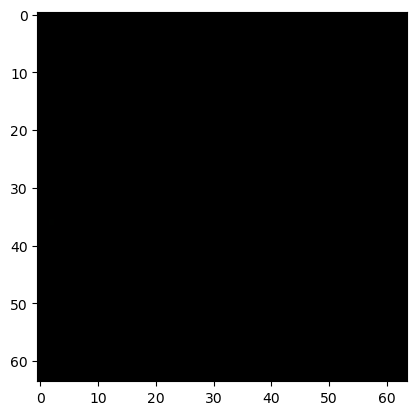

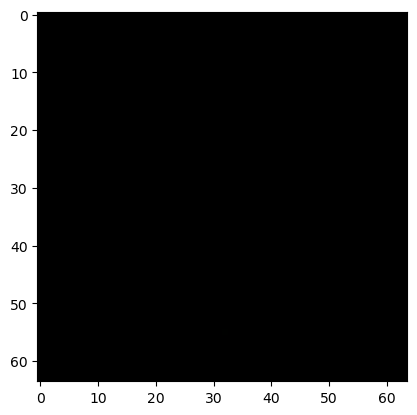

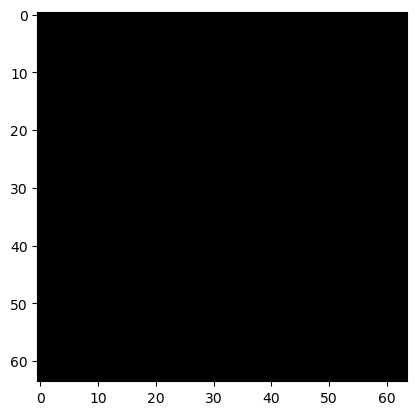

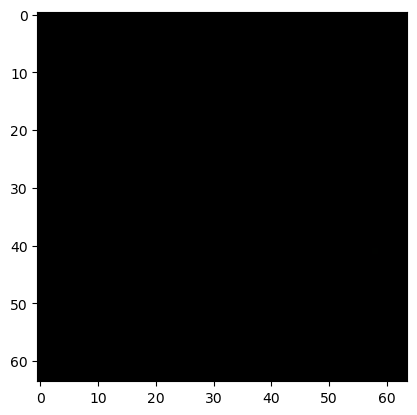

In [120]:
# Mostrar las imágenes aumentadas
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(np.squeeze(batch))  # Elimina la dimensión de lote para mostrar la imagen
    i += 1
    if i % 4 == 0:  # Mostrar 4 imágenes procesadas
        break

plt.show()

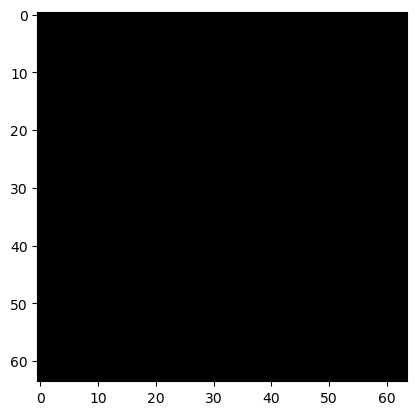

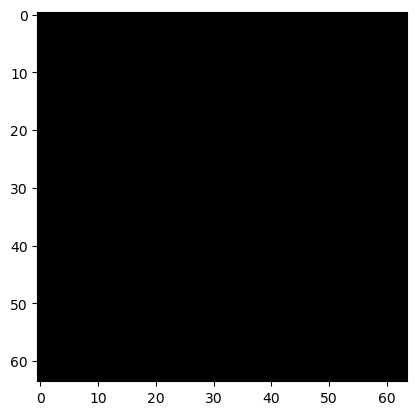

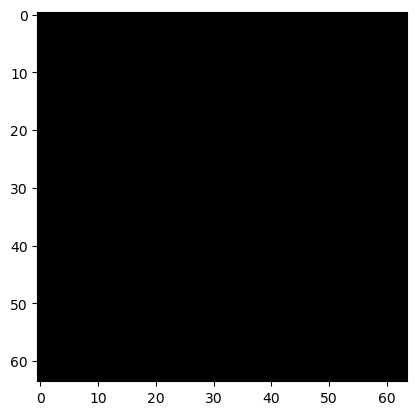

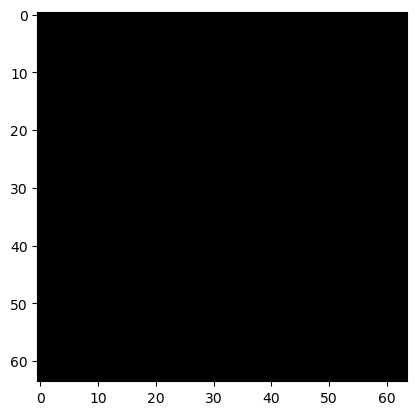

In [122]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Función para cargar una imagen
def load_image(image_path, target_size=(64, 64)):
    try:
        # Carga la imagen utilizando PIL (Pillow)
        img = Image.open(image_path)
        
        # Redimensiona la imagen al tamaño objetivo (opcional)
        img = img.resize(target_size)
        
        # Convierte la imagen a un arreglo NumPy y normaliza los valores de píxeles
        img = np.array(img) / 255.0
        
        return img
    except Exception as e:
        print(f"Error al cargar la imagen: {str(e)}")
        return None

# Ruta de la imagen
image_path = 'test/CLASS_05/05-CAPTURE_20220426_053617_430.png'  # Reemplaza con la ruta de tu imagen

# Cargar la imagen
img = load_image(image_path)

# Crear un generador de datos de imágenes con transformaciones de aumento de datos y normalización
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalizar los valores de píxeles al rango [0, 1]
    rotation_range=40,     # Rango de rotación aleatoria
    width_shift_range=0.2, # Desplazamiento horizontal aleatorio
    height_shift_range=0.2,# Desplazamiento vertical aleatorio
    shear_range=0.2,       # Cizallamiento aleatorio
    zoom_range=0.2,        # Zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal aleatorio
    fill_mode='nearest'    # Estrategia de relleno
)

# Añadir dimensión extra para el lote
img = img.reshape((1,) + img.shape)

# Mostrar las imágenes aumentadas
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(np.clip(np.squeeze(batch), 0, 1))  # Ajusta los valores de píxeles en el rango [0, 1]
    i += 1
    if i % 4 == 0:  # Mostrar 4 imágenes procesadas
        break

plt.show()

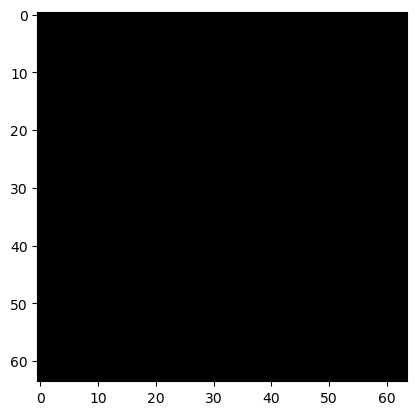

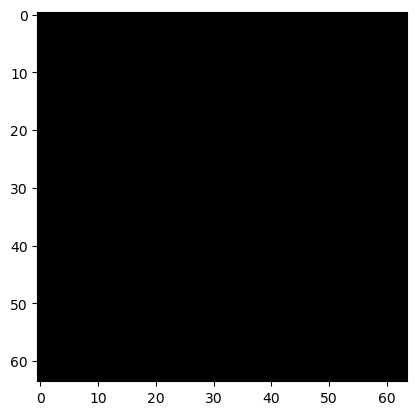

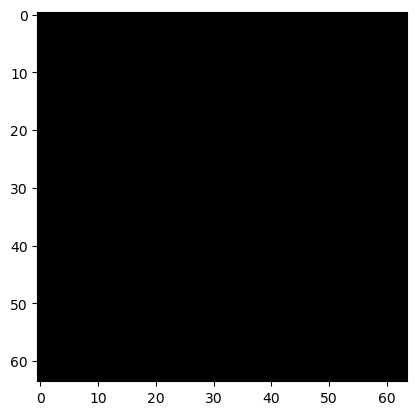

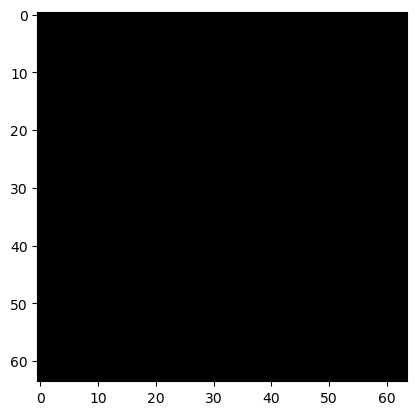

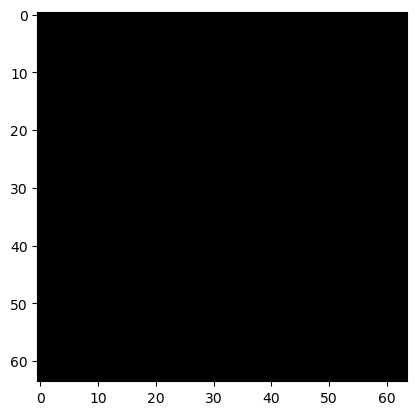

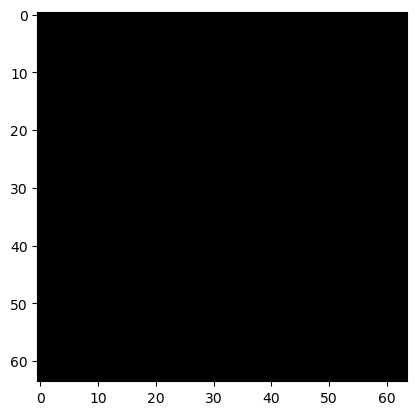

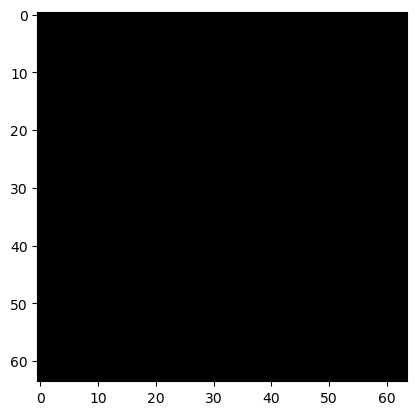

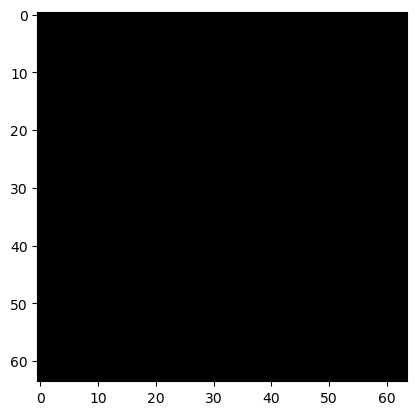

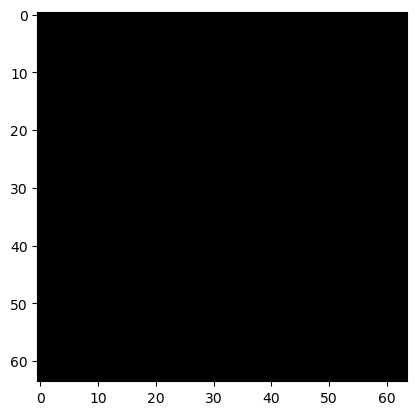

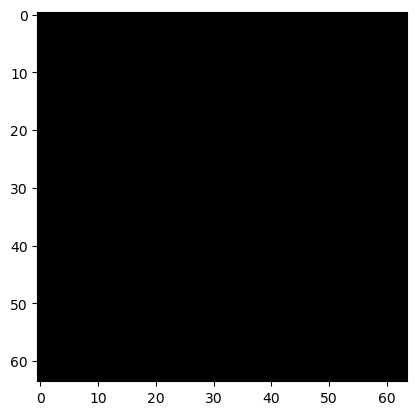

In [123]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Función para cargar una imagen
def load_image(image_path, target_size=(64, 64)):
    try:
        # Carga la imagen utilizando PIL (Pillow)
        img = Image.open(image_path)
        
        # Redimensiona la imagen al tamaño objetivo (opcional)
        img = img.resize(target_size)
        
        # Convierte la imagen a un arreglo NumPy y normaliza los valores de píxeles
        img = np.array(img) / 255.0
        
        return img
    except Exception as e:
        print(f"Error al cargar la imagen: {str(e)}")
        return None

# Ruta de la imagen
image_path = 'test/CLASS_03/08-CAPTURE_20220421_083721_386.png'  # Reemplaza con la ruta de tu imagen

# Cargar la imagen
img = load_image(image_path)

# Crear un generador de datos de imágenes con transformaciones de aumento de datos y normalización
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalizar los valores de píxeles al rango [0, 1]
    rotation_range=10,     # Reducir el rango de rotación aleatoria
    width_shift_range=0.1, # Reducir el desplazamiento horizontal aleatorio
    height_shift_range=0.1,# Reducir el desplazamiento vertical aleatorio
    shear_range=0.1,       # Reducir el cizallamiento aleatorio
    zoom_range=0.1,        # Reducir el zoom aleatorio
    horizontal_flip=True,  # Mantener el volteo horizontal aleatorio
    fill_mode='nearest'    # Estrategia de relleno
)

# Añadir dimensión extra para el lote
img = img.reshape((1,) + img.shape)

# Mostrar las imágenes aumentadas
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(np.clip(np.squeeze(batch), 0, 1))  # Ajusta los valores de píxeles en el rango [0, 1]
    i += 1
    if i % 10 == 0:  # Mostrar 10 imágenes procesadas
        break

plt.show()

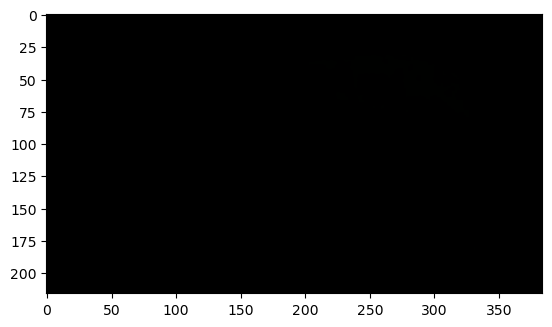

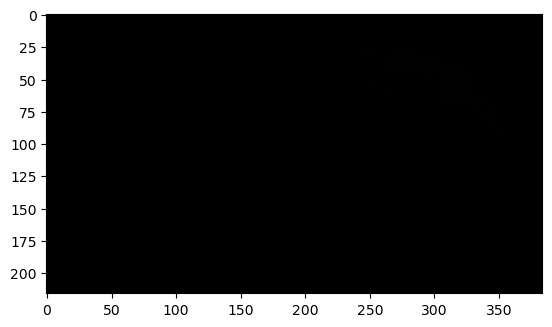

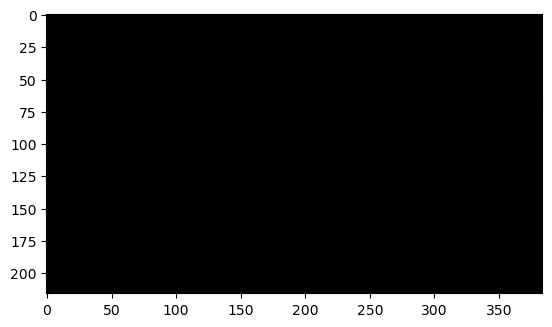

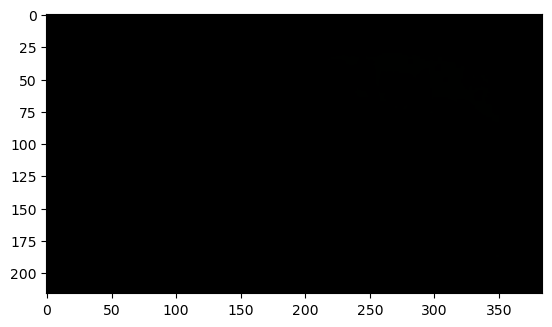

In [124]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Función para cargar una imagen
def load_image(image_path, target_size=(384, 216)):
    try:
        # Carga la imagen utilizando PIL (Pillow)
        img = Image.open(image_path)
        
        # Redimensiona la imagen al tamaño objetivo (opcional)
        img = img.resize(target_size)
        
        # Convierte la imagen a un arreglo NumPy y normaliza los valores de píxeles
        img = np.array(img) / 255.0
        
        return img
    except Exception as e:
        print(f"Error al cargar la imagen: {str(e)}")
        return None

# Ruta de la imagen
image_path = 'test/CLASS_04/09-CAPTURE_20220427_091425_500.png'  # Reemplaza con la ruta de tu imagen

# Cargar la imagen
img = load_image(image_path)

# Crear un generador de datos de imágenes con transformaciones de aumento de datos y normalización
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalizar los valores de píxeles al rango [0, 1]
    rotation_range=10,     # Reducir el rango de rotación aleatoria
    width_shift_range=0.1, # Reducir el desplazamiento horizontal aleatorio
    height_shift_range=0.1,# Reducir el desplazamiento vertical aleatorio
    shear_range=0.1,       # Reducir el cizallamiento aleatorio
    zoom_range=0.1,        # Reducir el zoom aleatorio
    horizontal_flip=True,  # Mantener el volteo horizontal aleatorio
    fill_mode='nearest'    # Estrategia de relleno
)

# Añadir dimensión extra para el lote
img = img.reshape((1,) + img.shape)

# Mostrar las imágenes aumentadas
i = 0
for batch in datagen.flow(img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(np.clip(np.squeeze(batch), 0, 1))  # Ajusta los valores de píxeles en el rango [0, 1]
    i += 1
    if i % 4 == 0:  # Mostrar 4 imágenes procesadas
        break

plt.show()